In [1]:
import networkx as nx
import matplotlib.pyplot as plt

**Exercise 2.1.** Adopt the forward difference method to approximate the Hessian
of $f(\mathbf{x})$ using its gradient, $\nabla f(\mathbf{x})$.

**Answer**:
$$
\mathbf{H}_{ij} \approx \frac{\nabla f(\mathbf{x} + \epsilon\mathbf{e_j})_i - \nabla f(\mathbf{x})_i}{\epsilon}
$$

where $\mathbf{e_j}$ is the $j$ th unit vector.

**Exercise 2.2.**  What is a drawback of the central difference method over other
finite difference methods if we already know $f(\mathbf{x})$?

**Answer**:
The central difference method requires two function evaluations, whereas the
forward difference method only requires one.

**Exercise 2.3.**  Compute the gradient of $f(x) = \ln(x) + e^x + 1/x$ for a point $x$ close to $0$ ($\epsilon>0$). What term dominates in the expression?

**Answer**:
$$
f'(\epsilon) = \frac{1}{x} + e^x - \frac{1}{x^2}
$$

$$
\frac{1}{x^2} > \frac{1}{x} > e^x,\quad \text{when x is small} 
$$

The $\frac{1}{x^2}$ term dominates.

**Exercise 2.4.**  Suppose $f(x)$ is a real-valued function that is also defined for complex inputs. If $f(3+ih)=2+4ih$, what is f'(3)?

**Answer**:
$$
f'(3) = \frac{\text{Im}\left(f(3 + ih)\right)}{h} = \frac{\text{Im}\left(2+4ih\right)}{h} = 4
$$


**Exercise 2.5.**  Draw the computational graph for $f(x,y) = \sin(x+y^2)$. Use the computational graph with forward accumulation to compute $\frac{\partial f}{\partial y}$ at $(x,y) = (1,1)$. Lable the intermediate values and partial derivatives as they are propagated through the graph.

**Answer**:

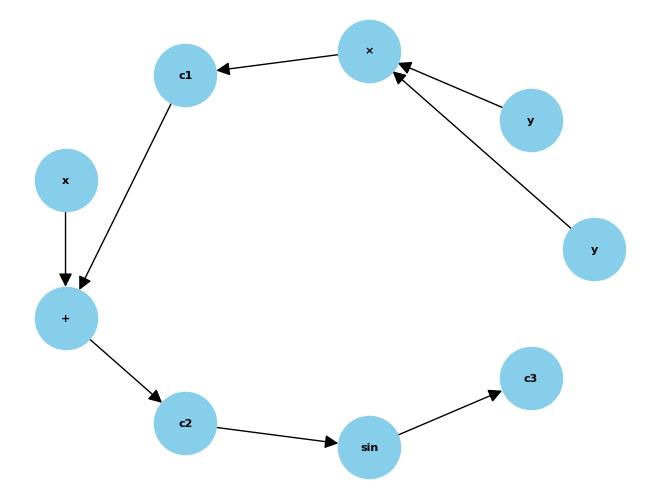

In [2]:
G = nx.DiGraph()

G.add_node('y1', label='y')
G.add_node('y2', label='y')

G.add_node('square', label=r'×')

G.add_edge('y1', 'square')
G.add_edge('y2', 'square')

G.add_node('c1', label='c1')
G.add_node('x', label='x')

G.add_node('plus', label='+')

G.add_edge('square', 'c1')
G.add_edge('c1', 'plus')
G.add_edge('x', 'plus')

G.add_node('c2', label='c2')
G.add_node('sin', label='sin')

G.add_edge('plus', 'c2')
G.add_edge('c2', 'sin')

G.add_node('c3', label='c3')

G.add_edge('sin', 'c3')

pos = nx.circular_layout(G)
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrowsize=20)

plt.show()

**Exercise 2.6.** Combine the forward and backward difference methods to obtain
a difference method for estimating the second-order derivative of a function $f$ at $x$ using three function evaluations.

**Answer**:
The forward difference method is

$$
f'(x) \approx \frac{f(x + \epsilon) - f(x) }{\epsilon}
$$

Applying the forward difference method to $f'(x)$ gives

$$
f''(x) \approx \frac{f'(x + \epsilon) - f'(x) }{\epsilon}
$$

Substituting the forward difference method for $f'(x)$ gives

$$
f''(x) \approx \frac{\frac{f(x + 2\epsilon) - f(x+\epsilon) }{\epsilon} - \frac{f(x + \epsilon) - f(x)}{\epsilon} }{\epsilon}
$$

Simplifying gives

$$
f''(x) \approx \frac{f(x + 2\epsilon) - 2f(x+\epsilon) + f(x) }{\epsilon^2}
$$

The backward difference method is

$$
f'(x) \approx \frac{f(x) - f(x - \epsilon) }{\epsilon}
$$

Applying the backward difference method to $f'(x)$ gives

$$
f''(x) \approx \frac{f'(x) - f'(x - \epsilon) }{\epsilon}
$$

Substituting the backward difference method for $f'(x)$ gives

$$
f''(x) \approx \frac{\frac{f(x) - f(x - \epsilon) }{\epsilon} - \frac{f(x - \epsilon) - f(x - 2\epsilon)}{\epsilon} }{\epsilon}
$$

Simplifying gives

$$
f''(x) \approx \frac{f(x) - 2f(x - \epsilon) + f(x - 2\epsilon) }{\epsilon^2}
$$

Taking the average of the forward and backward difference methods gives

$$
f''(x) \approx \frac{1}{2}\left(\frac{f(x + 2\epsilon) - 2f(x+\epsilon) + f(x) }{\epsilon^2} + \frac{f(x) - 2f(x - \epsilon) + f(x - 2\epsilon) }{\epsilon^2}\right)
$$

Simplifying gives

$$
f''(x) \approx \frac{f(x + \epsilon) - 2f(x) + f(x - \epsilon) }{\epsilon^2}
$$